In [57]:
# coding: utf-8

# ライブラリの読み込み
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pycaret.regression import setup

%matplotlib inline

In [58]:
# 学習データとテストデータの読み込み
# train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_excel("data.xlsx")
#train = pd.read_csv('train.csv')

test = pd.read_excel("yosoku.xlsx")

#train_data, valid_data = train_test_split(train, random_state=0)

train


kata      suryo          LT
0      a   0.410333    0.410333
1      b   0.534104    5.341038
2      b   0.649203    6.492034
3      a   0.664758    0.664758
4      b   0.971843    9.718428
..   ...        ...         ...
295    b  98.189894  981.898944
296    b  99.516568  995.165676
297    a  99.532486   99.532486
298    b  99.620493  996.204932
299    b  99.891401  998.914009

[300 rows x 3 columns]

In [59]:
# # Id列削除前の型を確認
# print("The train data size before dropping Id feature is : {} ".format(train.shape))
# print("The test data size before dropping Id feature is : {} ".format(test.shape))

# # Idだけ別に保持する
# train_ID = train['Id']
# test_ID = test['Id']

# # 予測に不要なのでId列を削除する
# train.drop("Id", axis = 1, inplace = True)
# test.drop("Id", axis = 1, inplace = True)

# # Id列削除後の型を確認
# print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
# print("The test data size after dropping Id feature is : {} ".format(test.shape))

# pycaret セットアップ

In [60]:

from pycaret.regression import setup
clf = setup(data=train, target="LT",   numeric_imputation="mean", categorical_imputation="mode")
#clf = setup(data=train, target="SalePrice",   numeric_imputation="mean", categorical_imputation="mode")



# pycaret 評価

In [61]:


from pycaret.regression import compare_models
best_model = compare_models()  # 全てのモデルを訓練し、評価する
print(best_model)


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3651, verbose=0, warm_start=False)


In [62]:
# from pycaret.regression import models
# print(models())  # 機械学習モデルの一覧

# pycaret ﾓﾃﾞﾙ作成

In [63]:
from pycaret.regression import create_model
model = create_model("et")  # モデルを作成
print(model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=3651, verbose=0, warm_start=False)


# pycaret 調整

In [64]:
from pycaret.regression import tune_model
tuned_model = tune_model(model)  # ハイパーパラメータの調整
print(tuned_model)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=6, max_features='sqrt', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0,
                    min_impurity_split=None, min_samples_leaf=3,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=190, n_jobs=-1, oob_score=False,
                    random_state=3651, verbose=0, warm_start=False)


In [ ]:
predict = predict_model()

# pycaret 特徴量の重要度

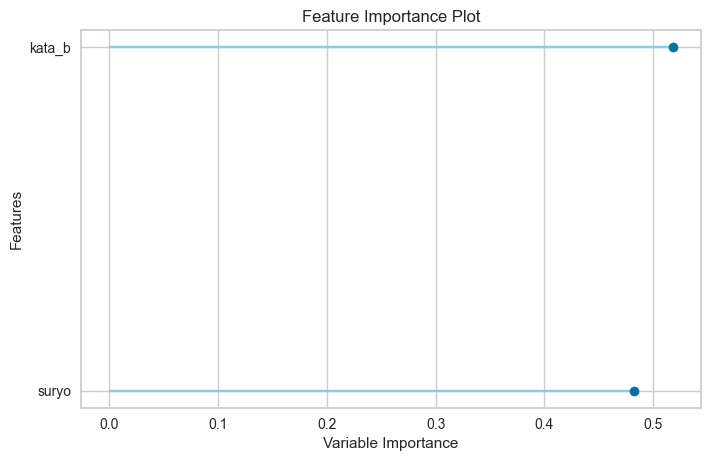

In [65]:
from pycaret.regression import plot_model
plot_model(tuned_model, plot="feature")  # 各特徴の重要度をプロット


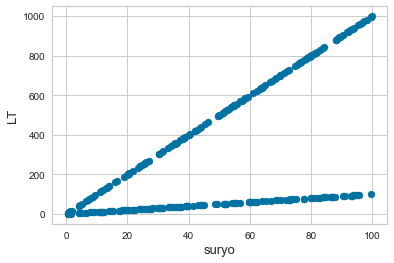

In [66]:
fig, ax = plt.subplots()
ax.scatter(x = train['suryo'], y = train['LT'])
plt.ylabel('LT', fontsize=13)
plt.xlabel('suryo', fontsize=13)
plt.show()

## 外れ値を除去する

In [67]:
# # 外れ値を除去する
# train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# # グラフで表示して再度チェックする
# fig, ax = plt.subplots()
# ax.scatter(train['GrLivArea'], train['SalePrice'])
# plt.ylabel('SalePrice', fontsize=13)
# plt.xlabel('GrLivArea', fontsize=13)
# plt.show()

mu = 278.64 and sigma = 309.74
※muは、中央値。 sigmaは、分散値


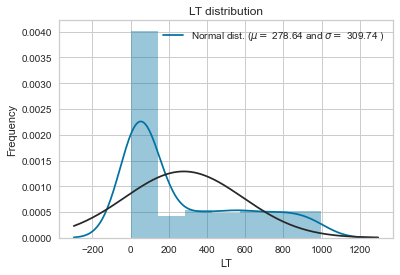

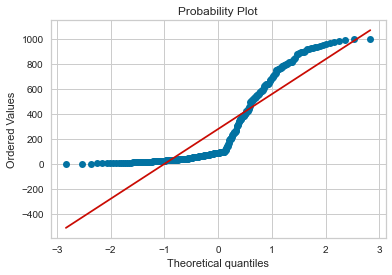

In [68]:
# 正規分布付きのヒストグラムを描画する
sns.distplot(train['LT'] , fit=norm);

# MLE(Maximum Likelihood Estimate)を用いて分布を推定する
(mu, sigma) = norm.fit(train['LT'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print('※muは、中央値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('LT distribution')

# QQプロットを描画する
# 正規QQプロットとは、観測値が正規分布に従う場合の期待値をY軸にとり、観測値そのものをX軸にとった確率プロット。
fig = plt.figure()
res = stats.probplot(train['LT'], plot=plt)
plt.show()

mu = 278.64 and sigma = 309.74
※muは、中央値。 sigmaは、分散値


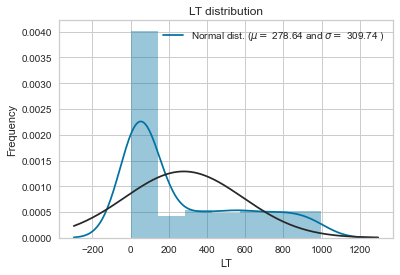

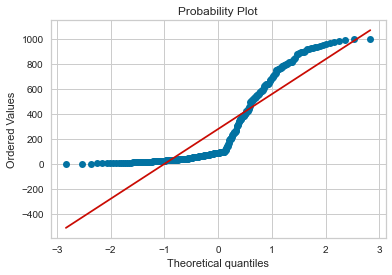

In [69]:
# SalePriceをlog(1+x)　で対数に変換する
#train["SalePrice"] = np.log1p(train["SalePrice"])

# 正規分布付きのヒストグラムを描画する
sns.distplot(train['LT'] , fit=norm);

# MLE(Maximum Likelihood Estimate)を用いて分布を推定する
(mu, sigma) = norm.fit(train['LT'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print('※muは、中央値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('LT distribution')

# QQプロットを描画する
# 正規QQプロットとは、観測値が正規分布に従う場合の期待値をY軸にとり、観測値そのものをX軸にとった確率プロット。
fig = plt.figure()
res = stats.probplot(train['LT'], plot=plt)
plt.show()

In [70]:
# 学習データとテストデータを連結して、all_dataを作成する
# ntrain = train.shape[0]
# ntest = test.shape[0]
# y_train = train.SalePrice.values
# #y_train.to_csv('y_train.csv')
# print(y_train)
#print(dtype(train))
# train.to_csv('a.csv')
# all_data = pd.concat((train, test)).reset_index(drop=True)
# all_data.to_csv('alldata.csv')
# all_data.drop(['SalePrice'], axis=1, inplace=True)
#print("all_data size is : {}".format(all_data.shape))

In [71]:
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'欠損比率' :all_data_na})
# missing_data.head(100)

train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'欠損比率' :train_na})
missing_data.head(100)




Empty DataFrame
Columns: [欠損比率]
Index: []

In [72]:
# f, ax = plt.subplots(figsize=(10, 8))
# plt.xticks(rotation='90')
# sns.barplot(x=train_na.index, y=train_na)
# plt.xlabel('Features', fontsize=15)
# plt.ylabel('Percent of missing values', fontsize=15)
# plt.title('Percent missing data by feature ', fontsize=15)

<AxesSubplot:>

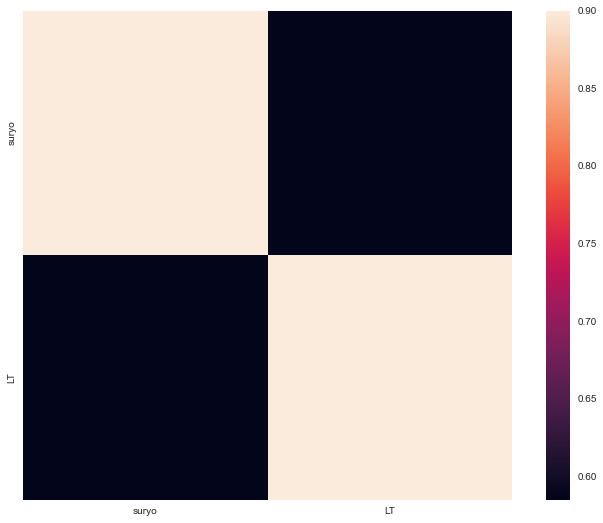

In [73]:
# SalePriceとの相関を確認する
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [74]:
#train = train.drop(['Utilities'], axis=1)

In [75]:
# train["PoolQC"] = train["PoolQC"].fillna("None")
# train["Alley"] = train["Alley"].fillna("None")
# train["Fence"] = train["Fence"].fillna("None")
# train["MiscFeature"] = train["MiscFeature"].fillna("None")
# train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
# train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
# for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
#     train[col] = train[col].fillna('None')
# for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
#     train[col] = train[col].fillna(0)
# for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
#     train[col] = train[col].fillna(0)
# for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
#     train[col] = train[col].fillna('None')
# train["MasVnrType"] = train["MasVnrType"].fillna("None")
# train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
# train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
# train["Functional"] = train["Functional"].fillna("Typ")
# train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
# train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
# train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
# train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
# train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
# train_na = (train.isnull().sum() / len(train)) * 100
# train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
# missing_data = pd.DataFrame({'欠損比率' :train_na})
# missing_data.head()


In [76]:
# # 数字型のカテゴリ変数を、文字列型に変更する
# train['MSSubClass'] = train['MSSubClass'].apply(str)
# train['OverallCond'] = train['OverallCond'].astype(str)
# train['YrSold'] = train['YrSold'].astype(str)
# train['MoSold'] = train['MoSold'].astype(str)

# #train.to_csv('train.csv')


In [77]:
# from sklearn.preprocessing import LabelEncoder
# cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
#         'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
#         'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
#         'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
#         'YrSold', 'MoSold')

# for c in cols:
#     lbl = LabelEncoder() 
#     lbl.fit(list(train[c].values)) 
#     train[c] = lbl.transform(list(train[c].values))

# print('Shape all_data: {}'.format(train.shape))
# train.to_csv('2.csv')

In [78]:
# #販売価格の予測には、面積関連の特徴が非常に重要なため、地下の総面積、各家の1階と2階の面積である特徴をもう1つ追加する
# train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [79]:
# numeric_feats = train.dtypes[train.dtypes != "object"].index

# skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("数値型変数の歪度: ")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.head(10)

In [80]:


#歪度の高い変数を、BoxCox変換する。Box-cox変換：データの構造を無理やり正規分布に変換してくれるらしい。  目的変数まで変えてしまうのでやめておく。 
# skewness = skewness[abs(skewness) > 0.75]
# print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])


In [81]:
train = train.reset_index(drop=True)  #インデックスをリセット（行削除がある場合、降り直ししておかないと、KFoldでエラーになる）
#train.to_csv('train.csv')

In [82]:
train.to_csv('4.csv')
train = pd.get_dummies(train)     #残りの文字列を数値化する
print(train.shape)


(300, 4)


In [83]:
# train = all_data[:ntrain]
# test = all_data[ntrain:]

#train.to_csv('train.csv')

In [84]:
#アルゴリズムに投入するため、特徴量と目的変数を分離
y_data_train = train['LT']
x_data_train = train.drop('LT', axis=1)

In [85]:
from sklearn.model_selection import KFold
import lightgbm as lgb

y_data_preds = []
models = []
oof_data_train = np.zeros((len(x_data_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)  #５は分割数の指定

params = { 
            'objective'     :'regression' 
            #,'max_bin'       : 300   #初期値255  https://www.codexa.net/lightgbm-beginner/
            #,'learning_rate' : 0.05  #初期値0.1
            #,'num_leaves'    : 40    #num_leaves(葉の数) 初期値31
         
         }  #最低限は目的を表すobjectiveを設定する binary:二値分類
            #公式の指針に従う：  https://lightgbm.readthedocs.io/en/latest/Parameters.html 


#categorical_features = ['1stFlrSF','2ndFlrSF','Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterCond','ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC','LotShape','LowQualFinSF','PavedDrive','PoolArea','PoolQC','ScreenPorch','Street']  #LightGBMはカテゴリ変数をそのまま処理できる（one-hot不要）    


    
for fold_id, (train_index, valid_index) in enumerate(cv.split(x_data_train)):  #指定数で分割して取り出す
    x_tr  = x_data_train.loc[train_index, :]
    x_val = x_data_train.loc[valid_index, :]
    y_tr  = y_data_train[train_index]
    y_val = y_data_train[valid_index]
    
    # lgb_data_train = lgb.Dataset(x_tr, y_tr,   categorical_feature=categorical_features)
    # lgb_data_eval  = lgb.Dataset(x_val, y_val, reference=lgb_data_train, categorical_feature=categorical_features)
    lgb_data_train = lgb.Dataset(x_tr, y_tr)
    lgb_data_eval  = lgb.Dataset(x_val, y_val, reference=lgb_data_train)

    model = lgb.train(params, lgb_data_train, valid_sets=lgb_data_eval,
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10
                 )
#     # verbose_eval=10           学習１０回ごとに画面に表示する
#     # num_boost_round=1000      学習の繰り返す回数 
#     # early_stopping_rounds=10  過学習を防ぐため  10回連続で誤差が減らない場合にSTOP
    
#     #各分割での検証用データに対する予測値を格納
    oof_data_train[valid_index] = model.predict(x_val, num_iteration=model.best_iteration)
    
#     #テストデータに対しての予測
#     #y_data_pred = model.predict(x_data_test, num_iteration=model.best_iteration)
    
#     #テストデータの予測結果を格納 （5回ループ分の結果を追加している）
#     #y_data_preds.append(y_data_pred)
    
#     #モデル自体を格納 （5回ループ分を追加している）
    models.append(model)



[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000025 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 85
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 3
[LightGBM] [Info] Start training from score 266.873472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [86]:
#各ベストスコアを格納
scores = [
    m.best_score['valid_0']['l2'] for m in models 
]
score = sum(scores) / len(scores)  # ベストスコアの平均を計算する
print(scores)
print(score)


[180.06997748825427, 125.5095118236474, 187.0751894970337, 349.6432568300652, 229.34959694813637]
214.3295065174274


             LT        pred      差_絶対値  差_絶対値per          差    差per
0      0.410333   -8.109217   8.519550    2076.0  -8.519550 -2076.0
1      5.341038   50.152441  44.811403     839.0  44.811403   839.0
2      6.492034   60.348273  53.856239     830.0  53.856239   830.0
3      0.664758   -1.931843   2.596601     391.0  -2.596601  -391.0
4      9.718428   60.348273  50.629845     521.0  50.629845   521.0
..          ...         ...        ...       ...        ...     ...
295  981.898944  947.162888  34.736057       4.0 -34.736057    -4.0
296  995.165676  928.896590  66.269086       7.0 -66.269086    -7.0
297   99.532486  113.479735  13.947249      14.0  13.947249    14.0
298  996.204932  928.896590  67.308342       7.0 -67.308342    -7.0
299  998.914009  947.162888  51.751121       5.0 -51.751121    -5.0

[300 rows x 6 columns]


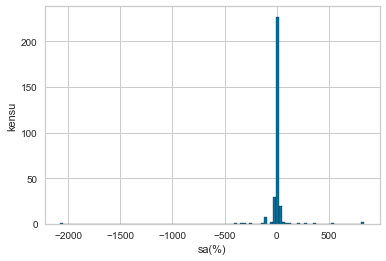

In [87]:

sub = pd.DataFrame()
# sub['pred'] = np.expm1(oof_data_train)
# sub['SalePrice'] = np.expm1( y_data_train )
sub['LT'] =   y_data_train     #正解値
sub['pred'] =  oof_data_train          #予測値
sub['差_絶対値'] = abs(sub['pred'] - sub['LT'])  #正解値と予測値の差の絶対値
sub['差_絶対値per'] = sub['差_絶対値']/sub['LT']*100
sub['差_絶対値per'] = sub['差_絶対値per'].round()

sub['差'] = sub['pred'] - sub['LT']
sub['差per'] = sub['差']/sub['LT']*100
sub['差per'] = sub['差per'].round()

#print(sub.describe())
print(sub)

#ヒストグラム作成
fig, ax = plt.subplots()
plt.title('')
plt.xlabel('sa(%)')
plt.ylabel('kensu')
ax.hist(sub['差per'], bins=100, ec="k")

#結果をCSV出力
sub.to_csv('submission.csv',index=False)





In [88]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [89]:
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [90]:
# # LASSO Regression（LASSO回帰）：
# # このモデルは外れ値に非常に敏感である可能性があるため、より堅牢にする必要がある。
# # そのために、パイプラインでsklearnのRobustscaler（）メソッドを使用する。
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [91]:
# Elastic Net Regression（Elastic Net 回帰） :
# 外れ値に対して堅牢にする
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [92]:
# Kernel Ridge Regression（カーネルリッジ回帰） :
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [93]:
# # Gradient Boosting Regression（勾配ブースティング回帰） :
# # 外れ値に対して、堅牢にするハブ損失
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

In [94]:
# # XGBoost :
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

In [95]:
# # LightGBM :
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
# #                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [96]:
# score = rmsle_cv(lasso)
# print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [97]:
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [98]:
# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [99]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [100]:
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [101]:
# score = rmsle_cv(model_lgb)
# print("LGBM score: {:.4f} ({:.4f})" .format(score.mean(), score.std()))

In [102]:
# class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
        
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
    
#     def predict(self, X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         return np.mean(predictions, axis=1) 

In [103]:
# averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

# score = rmsle_cv(averaged_models)
# print(" Averaged base models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [104]:
# class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, base_models, meta_model, n_folds=5):
#         self.base_models = base_models
#         self.meta_model = meta_model
#         self.n_folds = n_folds
   
#     def fit(self, X, y):
#         self.base_models_ = [list() for x in self.base_models]
#         self.meta_model_ = clone(self.meta_model)
#         kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
#         out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
#         for i, model in enumerate(self.base_models):
#             for train_index, holdout_index in kfold.split(X, y):
#                 instance = clone(model)
#                 self.base_models_[i].append(instance)
#                 instance.fit(X[train_index], y[train_index])
#                 y_pred = instance.predict(X[holdout_index])
#                 out_of_fold_predictions[holdout_index, i] = y_pred
                
#         self.meta_model_.fit(out_of_fold_predictions, y)
#         return self
   
#     def predict(self, X):
#         meta_features = np.column_stack([
#             np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
#             for base_models in self.base_models_ ])
#         return self.meta_model_.predict(meta_features)

In [105]:
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
#                                                  meta_model = lasso)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [106]:
# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))

In [107]:
# stacked_averaged_models.fit(train.values, y_train)
# stacked_train_pred = stacked_averaged_models.predict(train.values)
# stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# print(rmsle(y_train, stacked_train_pred))

In [108]:
# model_xgb.fit(train, y_train)
# xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
# print(rmsle(y_train, xgb_train_pred))

In [109]:
# model_lgb.fit(train, y_train)
# lgb_train_pred = model_lgb.predict(train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
# print(rmsle(y_train, lgb_train_pred))

In [110]:
# '''RMSE on the entire Train data when averaging'''

# print('RMSLE score on train data:')
# print(rmsle(y_train,stacked_train_pred*0.70 +
#                xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [111]:
# ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [112]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = ensemble
# sub.to_csv('submission.csv',index=False)